# Demo RNA Multi-Perceptrón Backpropagation para identificar TIPOS de ANIMALES
Adaptado de https://www.tensorflow.org/tutorials/estimator/premade

1) Cargar librerías:

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
from numpy.random import RandomState

from  sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Librerías cargadas")

TensorFlow 2.x selected.
Librerías cargadas


2) Cargar los datos:

In [0]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demo ANIMALES'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + '/datos/animales.csv')

df.head()

,TIENE_PELO,TIENE_PLUMAS,PONE_HUEVOS,DA_LECHE,ES_AEREO,ES_ACUATICO,ES_PREDADOR,TIENE_DIENTES,TIENE_COLUMNA,RESPIRA,ES_VENENOSO,TIENE_ALETAS,CANT_PATAS,TIENE_COLA,ES_DOMESTICO,TIPO
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [0]:
# define clases (ejemplo ANIMALES)
SPECIES = ['na', 'MAMIFERO', 'AVE', 'REPTIL', 'PEZ', 'ANFIBIO', 'INSECTO', 'INVERTEBRADO']

# define nombre atributo de CLASE (ejemplo ANIMALES)
ClassAttributeName = 'TIPO'

print("Configuración definida de ", ClassAttributeName, ": ", SPECIES)

Configuración definida de  TIPO :  ['na', 'MAMIFERO', 'AVE', 'REPTIL', 'PEZ', 'ANFIBIO', 'INSECTO', 'INVERTEBRADO']


In [0]:
# separa al azar con proporción 80/20
rng = RandomState()

train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

print("Datos Originales ", df.shape)
print("- Datos para Entrenar ", train.shape)
print("- Datos para Probar ", test.shape)

# genera los datos solo con la clase para entrenar y probar
train_y = train.pop(ClassAttributeName)
test_y = test.pop(ClassAttributeName)

Datos Originales  (101, 16)
- Datos para Entrenar  (81, 16)
- Datos para Probar  (20, 16)


3) Definir funciones auxiliares para el entrenamiento:

In [0]:
# funciones auxiliares para entrenar y probar 
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

    
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

4) Establecer el modelo para la RNA

In [0]:
# Construye un estimador tipo RNA 'Deep' Neuronal Network classifier
classifier = tf.estimator.DNNClassifier(
    
    feature_columns=my_feature_columns,

    hidden_units=[35, 25, 15], # 3 capas de 30, 20 y 10 neuronas ocultas    
    
    n_classes=len(SPECIES)) # identifica clases



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzaa2w1xt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


5) Entrenar el modelo de la RNA:

In [0]:
# Entrena el modelo
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=20000) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzaa2w1xt/model.ckpt.
INFO:tensorflow:loss = 2.0452087, step = 0
INFO:tensorflow:global_step/sec: 141.395
INFO:tensorflow:loss = 1.853982, step = 100 (0.712 sec)
INFO:tensorflow:global_step/sec: 172.047
INFO:tensorflow:loss = 1.7338763, step = 200 (0.578 sec)
INFO:tensorflow:global_step/sec: 171.763
INFO:tensorflow:loss = 1.6699457, step = 300 (0.587 sec)
INFO:tensorflow:global_step/sec: 187.708
INFO:tensorflow:loss = 1.5901444, step = 400 (0.528 sec)
INFO:tensorflow:global_step/sec: 178.344
INFO:tensorflow:loss = 1.5628126, step = 500 (0.565 sec)
INFO:tensorflow:global_step/sec: 152.596
INFO:tensorflow:loss = 1.4754411, step = 600 (0.656 sec)
INFO:tensorflow:global_step/sec: 164.33
INFO:tensorflow:lo

6) Evaluar el modelo de la RNA entrenado:

In [0]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nExactitud: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-02T13:00:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzaa2w1xt/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.37814s
INFO:tensorflow:Finished evaluation at 2020-03-02-13:00:54
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.85, average_loss = 0.9309324, global_step = 20000, loss = 0.9309324
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /tmp/tmpzaa2w1xt/model.ckpt-20000

Exactitud: 0.850



7) Mostrar el detalle con predicciones sobre datos de Prueba:


 Resultados: 
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzaa2w1xt/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Clase predecida es "MAMIFERO"[1] (99.6%), la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1] (99.8%), la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1] (93.6%), la correcta es "MAMIFERO"[1] 
Clase predecida es "MAMIFERO"[1] (99.8%), la correcta es "MAMIFERO"[1] 
Clase predecida es "INVERTEBRADO"[7] (62.6%), la correcta es "ANFIBIO"[5]! 
Clase predecida es "MAMIFERO"[1] (99.8%), la correcta es "MAMIFERO"[1] 
Clase predecida es "INSECTO"[6] (97.1%), la correcta es "INSECTO"[6] 
Clase predecida es "MAMIFERO"[1] (99.8%), la correcta es "MAMIFERO"[1] 
Clase predecida es "AVE"[2] (95.0%), la correcta es "AVE"[2] 
Clase predecida es "PEZ"[4] (95.8%), la correcta es "PEZ"[4] 
Clase predecid

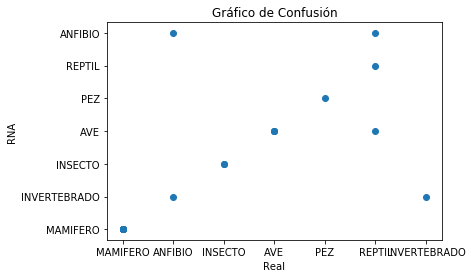

In [0]:
# funciones auxiliares
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

predictions = classifier.predict(
    input_fn=lambda: input_fn(test))


# muestra resultados de la predicción
classPreds = []
classReal = []
cantOK = 0
cantError = 0
print("\n Resultados: ")
for pred_dict, expec in zip(predictions, test_y):
    pred_class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][pred_class_id]
    
    classPreds.append(SPECIES[pred_class_id])
    classReal.append(SPECIES[expec])

    if (pred_class_id == expec): 
      res = ""
      cantOK += 1
    else: 
      res = "!"
      cantError += 1

    print('Clase predecida es "{}"[{}] ({:.1f}%), la correcta es "{}"[{}]{} '.format(
        SPECIES[pred_class_id], pred_class_id, 100 * probability, SPECIES[expec], expec, res))

print('=== Total Ejemplos: {}, con {} predicciones ok y {} errores.'.format(cantOK+cantError, cantOK, cantError))

# gráfico de comparación
plt.title('Gráfico de Confusión')
plt.xlabel('Real')
plt.ylabel('RNA')
plt.scatter(classReal, classPreds)

# muestra reporte de clasificación
print("\n Reporte de Clasificación: ")
print(classification_report(classReal, classPreds))

# muestra matriz de confusion
print('\nMatriz de Confusión: ')
cm = confusion_matrix(classReal, classPreds, labels=SPECIES)
cmtx = pd.DataFrame(
    cm, 
    index=['r:{:}'.format(x) for x in SPECIES], 
    columns=['p:{:}'.format(x) for x in SPECIES]
  )
print(cmtx)
print("\n")
